In [1]:
import pymysql
from openpyxl import Workbook

# Connect to MySQL database
connection = pymysql.connect(host='localhost',
                               user='root',
                               password="",
                               database='iot_project_water_pump')

# Create a new Excel workbook
wb = Workbook()
ws = wb.active

# Define column headers
headers = ["time", "water_level"]

# Write headers to the first row
for col_index, header in enumerate(headers, start=1):
    ws.cell(row=1, column=col_index, value=header)

# Execute SQL query and fetch data
query = "SELECT * FROM water_level_data"
cursor = connection.cursor()
cursor.execute(query)
data = cursor.fetchall()

# Write data to Excel (starting from the second row)
for row_index, row_data in enumerate(data, start=2):
    for col_index, cell_data in enumerate(row_data, start=1):
        ws.cell(row=row_index, column=col_index, value=cell_data)

# Save the workbook as output.xlsx (change to .csv if needed, though `.xlsx` is better for Excel format)
wb.save('output.xlsx')

# Close the connection
connection.close()


                 time  water_level
0 2024-11-27 18:30:00       999.98
1 2024-11-27 18:30:01       999.95
2 2024-11-27 18:30:02       999.93
3 2024-11-27 18:30:03       999.90
4 2024-11-27 18:30:04       999.88


C:\Users\ankan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


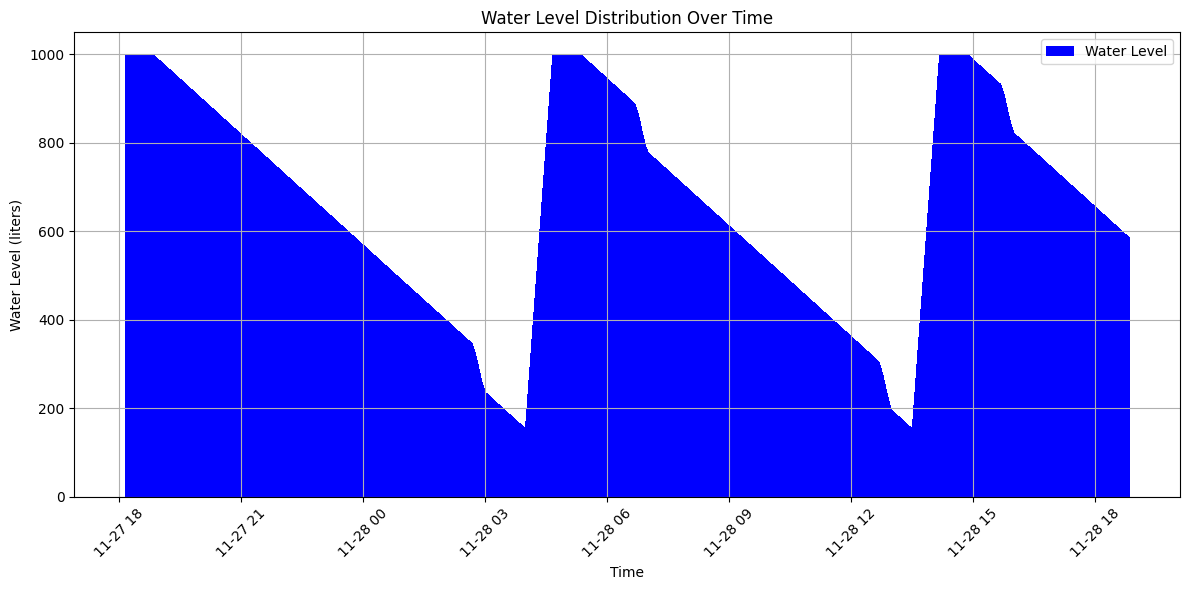

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
df = pd.read_excel('output.xlsx')

# Check the first few rows to understand the data structure
print(df.head())

# Assuming 'time' is the first column and 'water_level' is the second column
# Ensure 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Round 'water_level' to 2 decimal places to ensure more precision
df['water_level'] = df['water_level'].round(2)

# Resample the data (optional) for higher precision, e.g., using hourly data points
# df.set_index('time', inplace=True)  # Optional if you want 'time' as the index
# df_resampled = df.resample('H').mean()  # You can adjust 'H' (hour) to your preferred frequency

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['time'], df['water_level'], label='Water Level', color='b', width=0.03)  # Adjust width for bar width
plt.xlabel('Time')
plt.ylabel('Water Level (liters)')
plt.title('Water Level Distribution Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()
